# Interpolasjon

## Live kodeeksempel fra forelesningen, 6. november 2018

### IN-KJM1900

---

<p></p>
Vi er gitt f?lgende tabell for trykk $P$ som funksjon av temperatur $T$. 
</p></p>

<table>
  <tr>
    <th>
    Temp (°„C)
    </th>
    <th>
    Pdamp (atm)
    </th>
    </tr>
    <tr>
      <td>
          16.0
      </td>
        <td>
          0.01793
      </td>
   </tr>
   
   <tr>
      <td>
          18.0
      </td>
        <td>
          0.02036
      </td>
   </tr>
   
   <tr>
      <td>
          20.0
      </td>
        <td>
          0.02308
      </td>
   </tr>
 
   <tr>
      <td>
          22.0
      </td>
        <td>
          0.02609
      </td>
   </tr>
   
   <tr>
      <td>
          24.0
      </td>
        <td>
          0.02945
      </td>
   </tr>
   
   <tr>
      <td>
          26.0
      </td>
        <td>
          0.03317
      </td>
   </tr>
   
   <tr>
      <td>
          28.0
      </td>
        <td>
          0.03730
      </td>
   </tr>   
   
   <tr>
      <td>
          30.0
      </td>
        <td>
          0.04187   
      </td>
   </tr>  
   
</table>

Ser det kjent ut? (Det kan tenkes at du har m?tt den p? laben i KJM1101).

En line?r interpolasjon for trykket mellom datapunktene (for temperature) $t_i$ og $t_{i+1}$ er gitt ved

\begin{equation}
P(t) = \left(\frac{P_{i+1} - P_{i}}{t_{i+1} - t_{i}}\right) (t - t_{i+1})  + P_{i+1}
\end{equation}
<p></p>
Legg merke til at vi i uttrykket over kun har en ukjent variabel $t$, resten er oppgitt i tabellen.
<p></p>
<b>Oppgave:</b> Skriv en funksjon som tar inn en $t$ i intervallet 16 til 30 °„C og returnerer trykket.

Skriv f?rst funksjonen selv som en stykkevis line?r interpolasjon, og benytt deretter `interp1d` fra `scipy.interpolate` for ? gj?re det samme.

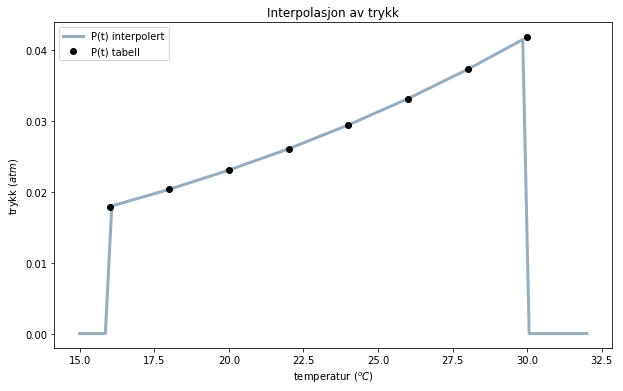

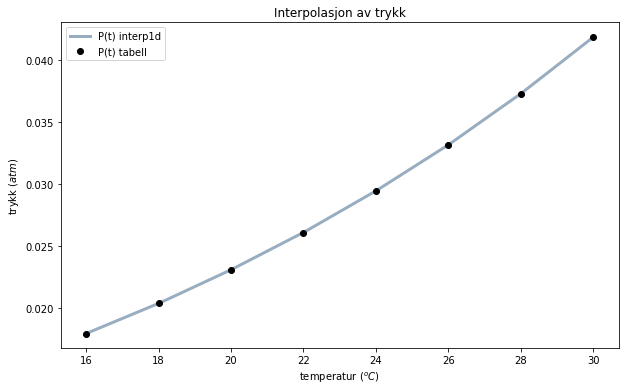

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def P_t(t):
    """
    En stykkevis (= delt forskrift)
    interpolert funksjon for 
    trykket som funksjon av 
    temperatur.
    
    t = temperatur
    
    returnerer P(t)
    """
    
    # Verdier fra tabellen:
    T = np.arange(16,31,2) #verdier for temperatur
    P = np.array([0.01793,
                  0.02036,
                  0.02308,
                  0.02609,
                  0.02945,
                  0.03317,
                  0.03730,
                  0.04187]) #verdier for trykk
    
    # Returner 0 dersom vi er utenfor intervallet
    if t<16.0:
        return 0
    if t>30.0:
        return 0
    
    # bestem intervallet hvor vi finner t: i, i+1
    i = 0
    while i <= len(T)-1:
        if t>=T[i] and t<T[i+1]:
            break
        i += 1
    
    # N?r vi kjenner i kan vi beregne funksjonsverdien i t
    P_current = P[i]
    P_next    = P[i+1]
    
    T_current = T[i]
    T_next    = T[i+1]
    
    a = (P_next-P_current)/(T_next-T_current) #Her er stigningstallet

    return a*(t-T_next)  + P_next #Her er selve uttrykket for P(t) (ligining i teksten over)
    

# ?kt oppl?sning, ?nsker interpolerte verdier i disse datapunktene
t = np.linspace(15,32,80)

# En array for de interpolerte verdiene
p_damp_interpolert = np.zeros(len(t), dtype = float)

# beregner trykket for hvert av de nye datapunktene
for i in np.arange(len(t)):
    p_damp_interpolert[i] = P_t(t[i]) 
 



# Plotter til slutt resultatet
plt.figure(1, figsize = (10,6))
plt.title("Interpolasjon av trykk")
plt.plot(t, p_damp_interpolert, "-", label = "P(t) interpolert", alpha = .4, color = (0,.2,.4), linewidth = 3)
plt.plot(T,P, "o", label = "P(t) tabell", color = (0,0,0))

plt.xlabel("temperatur ($^oC$)")
plt.ylabel("trykk ($atm$)")
plt.legend()
plt.show()

# Vi gj?r en ekstra beregning hvor vi benytter interp1d

from scipy.interpolate import interp1d #importer interpolasjonsfunksjonen

# Definerer her tabellen globalt, i motsetning til i funksjonen over
T = np.arange(16,31,2) #verdier for temperatur
P = np.array([0.01793,
              0.02036,
              0.02308,
              0.02609,
              0.02945,
              0.03317,
              0.03730,
              0.04187]) #verdier for trykk




p_interp1d = interp1d(T, P, 1) # tallet 1 svarer til en line?r interpolasjon

t = np.linspace(16,30,200)

# plott resultatene
plt.figure(1, figsize = (10,6))
plt.title("Interpolasjon av trykk")
plt.plot(t, p_interp1d(t), "-", label = "P(t) interp1d", alpha = .4, color = (0,.2,.4), linewidth = 3)
plt.plot(T,P, "o", label = "P(t) tabell", color = (0,0,0))

plt.xlabel("temperatur ($^oC$)")
plt.ylabel("trykk ($atm$)")
plt.legend()
plt.show()
